In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Evaluate
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score , recall_score, classification_report

In [2]:
# Load dataset

from google.colab import drive
drive.mount('/content/drive')

files = "/content/drive/MyDrive/Github/fraud_detection_train.csv"
df = pd.read_csv(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Understanding

### Collecting Data

In [3]:
df.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.columns

Index(['visit_id', 'kdkc', 'dati2', 'typeppk', 'jkpst', 'umur', 'jnspelsep',
       'los', 'cmg', 'severitylevel', 'diagprimer', 'dx2_a00_b99',
       'dx2_c00_d48', 'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99',
       'dx2_g00_g99', 'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99',
       'dx2_j00_j99', 'dx2_koo_k93', 'dx2_l00_l99', 'dx2_m00_m99',
       'dx2_n00_n99', 'dx2_o00_o99', 'dx2_p00_p96', 'dx2_q00_q99',
       'dx2_r00_r99', 'dx2_s00_t98', 'dx2_u00_u99', 'dx2_v01_y98',
       'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27', 'proc28_28',
       'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51', 'proc52_57',
       'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73', 'proc74_75',
       'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99', 'procv00_v89',
       'label'],
      dtype='object')

In [5]:
df.nunique()

visit_id         200217
kdkc                126
dati2               486
typeppk              25
jkpst                 2
umur                105
jnspelsep             2
los                 142
cmg                  23
severitylevel         4
diagprimer           21
dx2_a00_b99           5
dx2_c00_d48           4
dx2_d50_d89           4
dx2_e00_e90           7
dx2_f00_f99           3
dx2_g00_g99           5
dx2_h00_h59           5
dx2_h60_h95           4
dx2_i00_i99           7
dx2_j00_j99           5
dx2_koo_k93           1
dx2_l00_l99           4
dx2_m00_m99           4
dx2_n00_n99           5
dx2_o00_o99           7
dx2_p00_p96          14
dx2_q00_q99           7
dx2_r00_r99           5
dx2_s00_t98           8
dx2_u00_u99           1
dx2_v01_y98           3
dx2_z00_z99           6
proc00_13             5
proc14_23             6
proc24_27             4
proc28_28             3
proc29_31             3
proc_32_38            6
proc39_45             5
proc46_51             4
proc52_57       

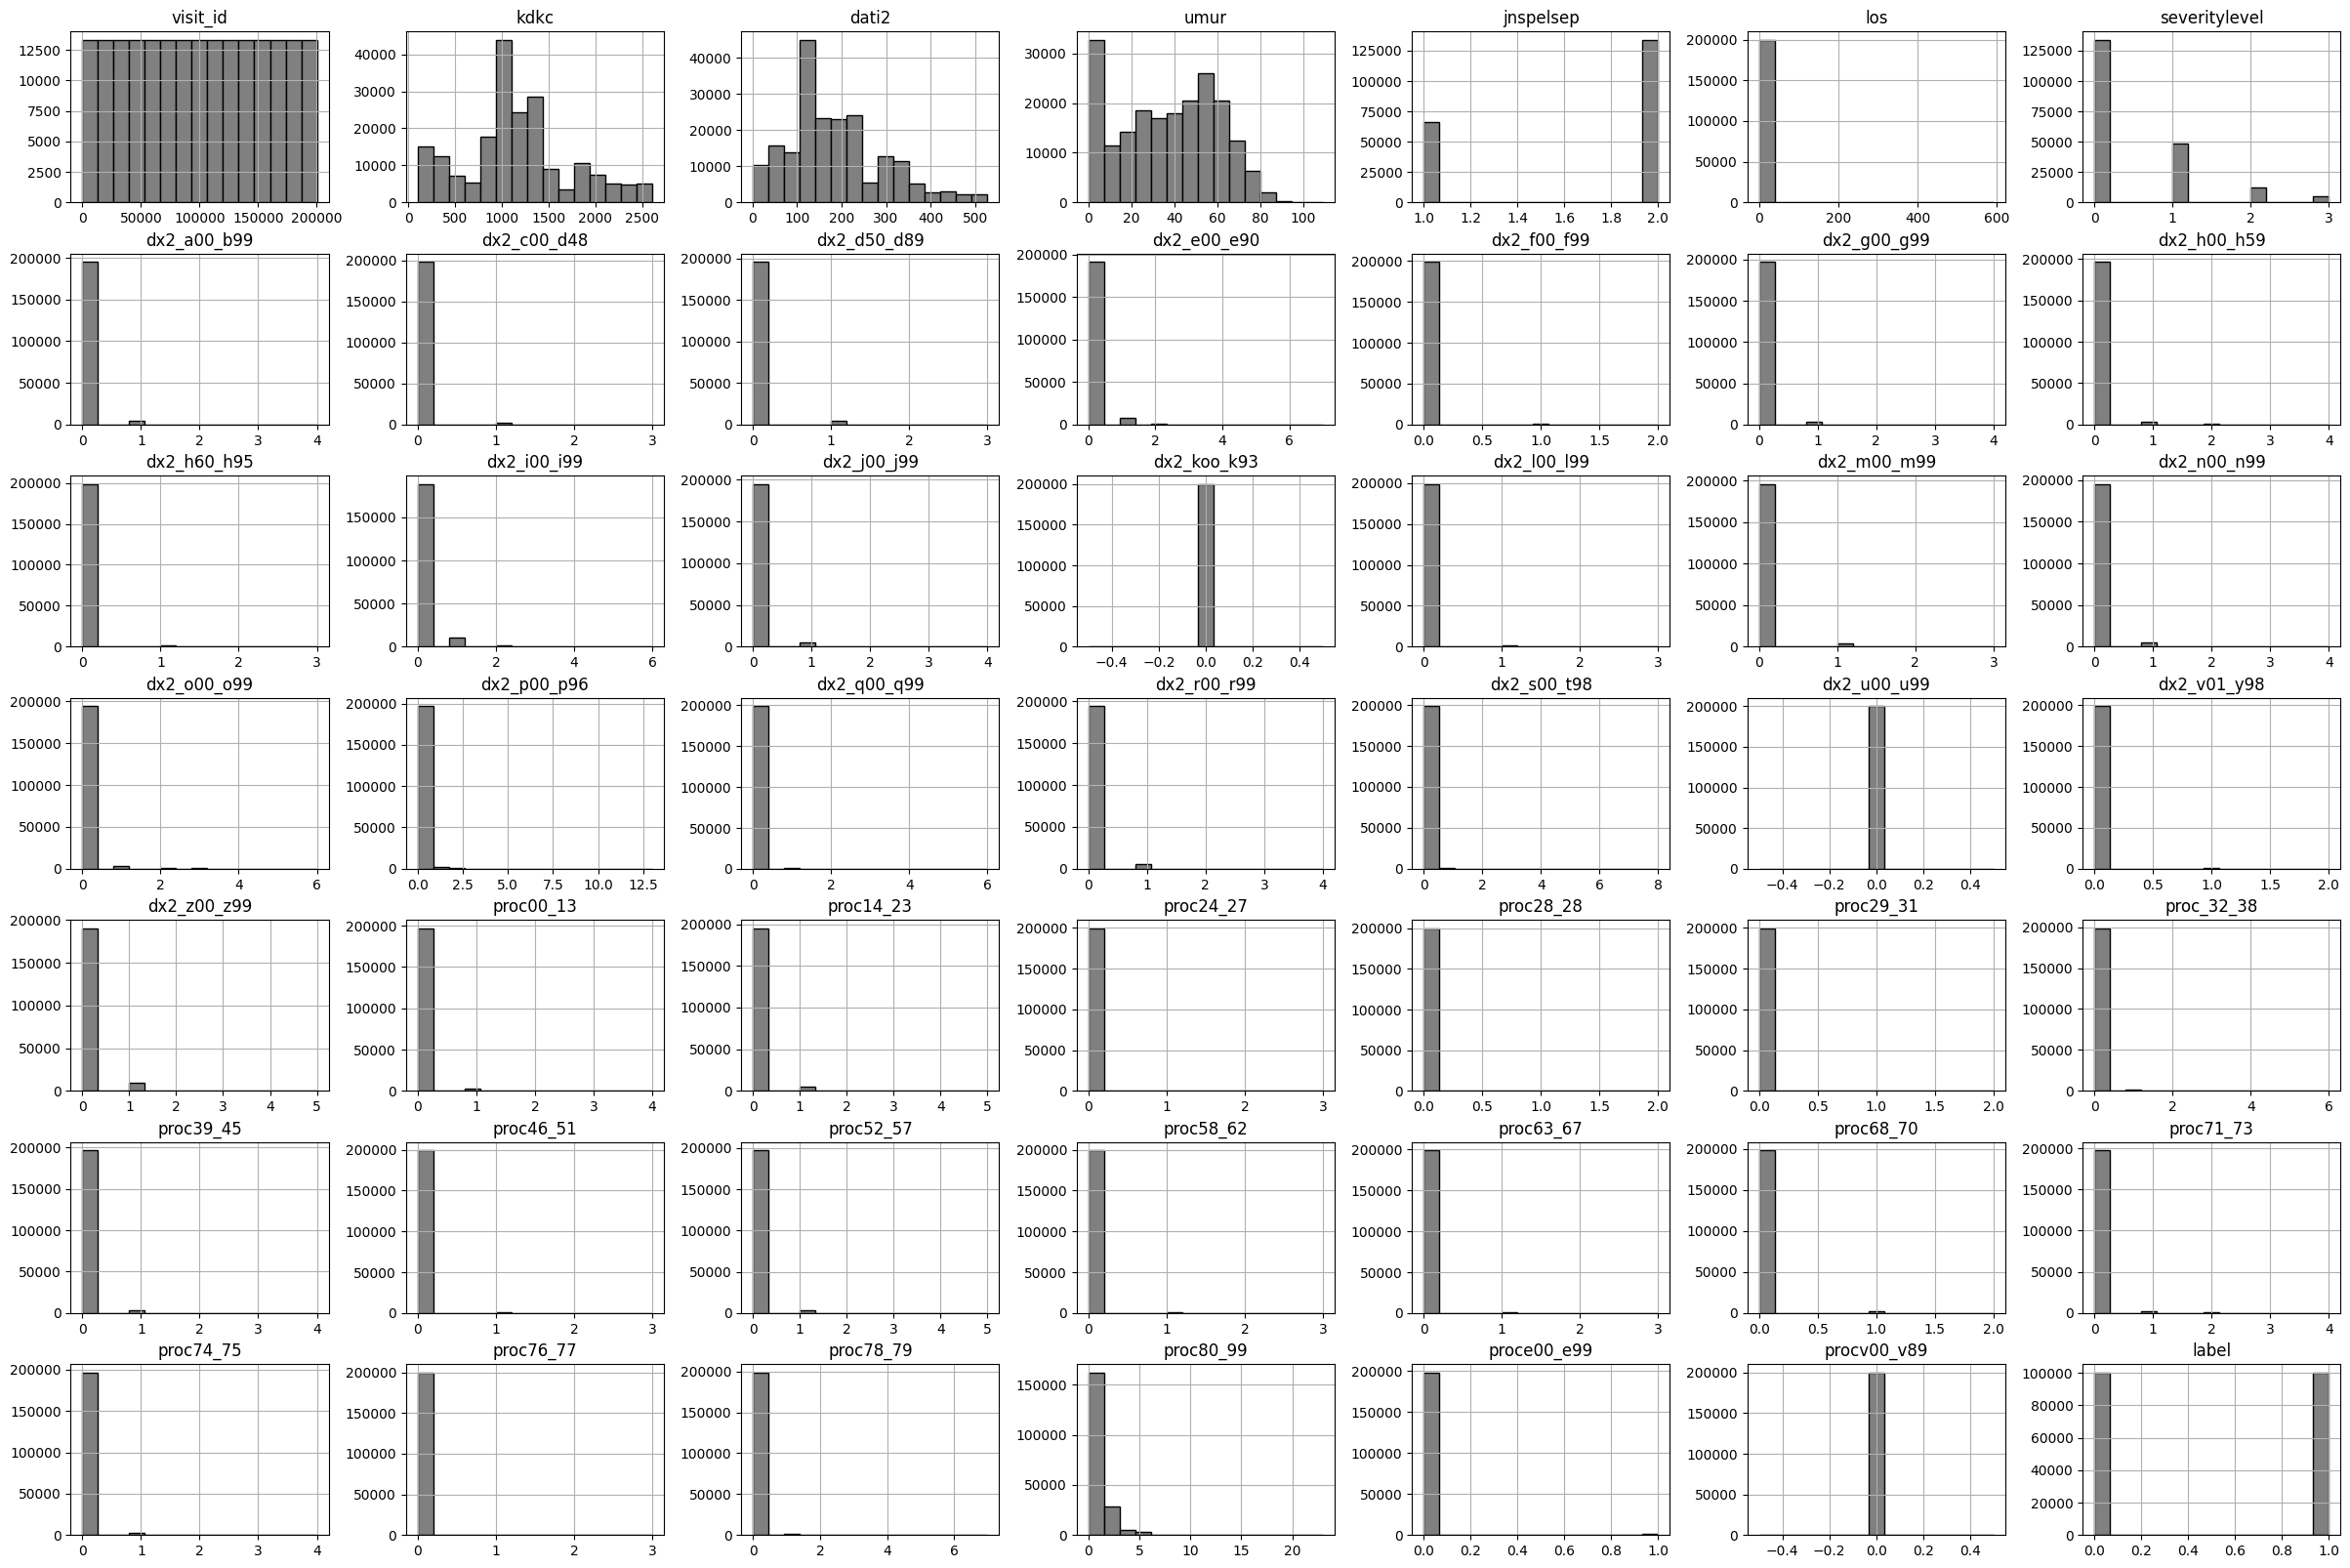

In [6]:
## Histogram for all atribute
df.hist(edgecolor = 'black', bins = 15, figsize = (30, 20), color='gray');

### Describe Data

In [7]:
df.describe(include = "all")

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
count,200217.000000,200217.000000,200217.000000,200217,200217,200217.000000,200217.000000,200217.000000,200217,200217.000000,...,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000
unique,NaN,NaN,NaN,25,2,NaN,NaN,NaN,23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,SC,P,NaN,NaN,NaN,Q,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,50140,107374,NaN,NaN,NaN,81736,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,100109.000000,1147.367816,184.793309,NaN,NaN,36.850602,1.669778,1.303356,NaN,0.444003,...,0.005050,0.008381,0.016472,0.018370,0.001518,0.007457,0.847061,0.009225,0.0,0.500732
std,57797.813761,574.486224,107.226676,NaN,NaN,23.095928,0.470294,5.639751,NaN,0.725227,...,0.073984,0.094393,0.155667,0.144878,0.043995,0.100441,1.301645,0.095603,0.0,0.500001
min,1.000000,101.000000,1.000000,NaN,NaN,0.000000,1.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,50055.000000,903.000000,114.000000,NaN,NaN,18.000000,1.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,100109.000000,1101.000000,169.000000,NaN,NaN,39.000000,2.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,150163.000000,1314.000000,232.000000,NaN,NaN,56.000000,2.000000,2.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

In [9]:
df.size

10611501

In [10]:
df.shape

(200217, 53)

### Validation Data

In [11]:
# Checking Missing Value wih Boolean
df.isnull().any()

visit_id         False
kdkc             False
dati2            False
typeppk          False
jkpst            False
umur             False
jnspelsep        False
los              False
cmg              False
severitylevel    False
diagprimer       False
dx2_a00_b99      False
dx2_c00_d48      False
dx2_d50_d89      False
dx2_e00_e90      False
dx2_f00_f99      False
dx2_g00_g99      False
dx2_h00_h59      False
dx2_h60_h95      False
dx2_i00_i99      False
dx2_j00_j99      False
dx2_koo_k93      False
dx2_l00_l99      False
dx2_m00_m99      False
dx2_n00_n99      False
dx2_o00_o99      False
dx2_p00_p96      False
dx2_q00_q99      False
dx2_r00_r99      False
dx2_s00_t98      False
dx2_u00_u99      False
dx2_v01_y98      False
dx2_z00_z99      False
proc00_13        False
proc14_23        False
proc24_27        False
proc28_28        False
proc29_31        False
proc_32_38       False
proc39_45        False
proc46_51        False
proc52_57        False
proc58_62        False
proc63_67  

In [12]:
# Count Missing Value 
df.isnull().sum()

visit_id         0
kdkc             0
dati2            0
typeppk          0
jkpst            0
umur             0
jnspelsep        0
los              0
cmg              0
severitylevel    0
diagprimer       0
dx2_a00_b99      0
dx2_c00_d48      0
dx2_d50_d89      0
dx2_e00_e90      0
dx2_f00_f99      0
dx2_g00_g99      0
dx2_h00_h59      0
dx2_h60_h95      0
dx2_i00_i99      0
dx2_j00_j99      0
dx2_koo_k93      0
dx2_l00_l99      0
dx2_m00_m99      0
dx2_n00_n99      0
dx2_o00_o99      0
dx2_p00_p96      0
dx2_q00_q99      0
dx2_r00_r99      0
dx2_s00_t98      0
dx2_u00_u99      0
dx2_v01_y98      0
dx2_z00_z99      0
proc00_13        0
proc14_23        0
proc24_27        0
proc28_28        0
proc29_31        0
proc_32_38       0
proc39_45        0
proc46_51        0
proc52_57        0
proc58_62        0
proc63_67        0
proc68_70        0
proc71_73        0
proc74_75        0
proc76_77        0
proc78_79        0
proc80_99        0
proce00_e99      0
procv00_v89      0
label       

In [13]:
# Checking Duplicate Value
a = df.duplicated().any()
b = df.duplicated().sum()
if a == True:
  print("Num of duplicate data: ", b)
else:
  print("No duplicate data")

No duplicate data


#### Visualization for More Understanding

In [14]:
df['label'].value_counts()

1    100255
0     99962
Name: label, dtype: int64

In [15]:
nonfraud = df[df['label']==0]
nonfraud

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
100255,100256,201,38,SC,P,28,2,0,K,0,...,0,0,0,0,0,0,0,0,0,0
100256,100257,1003,223,SC,P,0,1,2,P,1,...,0,0,0,0,0,0,0,0,0,0
100257,100258,304,55,C,L,17,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
100258,100259,1315,205,SC,P,43,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
100259,100260,1308,212,A,L,6,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,200213,2102,353,B,P,48,2,0,Z,0,...,0,0,0,0,0,0,1,0,0,0
200213,200214,1308,212,SD,L,1,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
200214,200215,201,38,SB,P,3,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,0
200215,200216,1008,128,B,P,52,1,1,J,1,...,0,0,0,0,0,0,1,0,0,0


In [16]:
fraud = df[df['label']==1]
fraud

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100250,100251,1013,123,C,L,45,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
100251,100252,702,441,C,L,32,1,2,A,1,...,0,0,0,0,0,0,0,0,0,1
100252,100253,902,112,SC,P,5,2,0,K,0,...,0,0,0,0,0,0,2,0,0,1
100253,100254,905,483,D,L,69,2,0,J,0,...,0,0,0,0,0,0,1,0,0,1


In [17]:
print( 'persentase transaksi fraud =', (float(len(fraud)) / len(df) )*100,"%")

persentase transaksi fraud = 50.07317060988827 %


<Axes: xlabel='label', ylabel='count'>

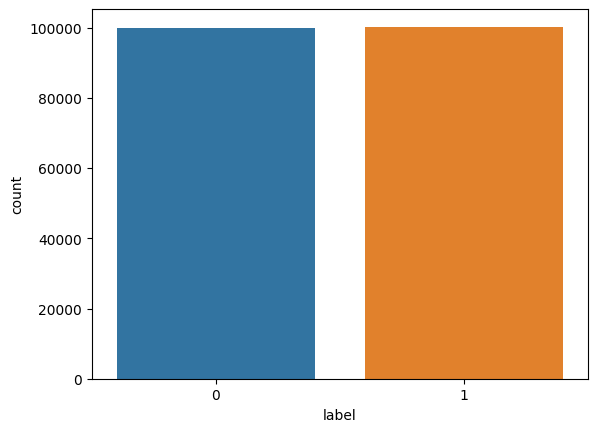

In [18]:
sns.countplot(x = df['label'], label = "Count") 

Label as pie chart:


Text(0, 0.5, '')

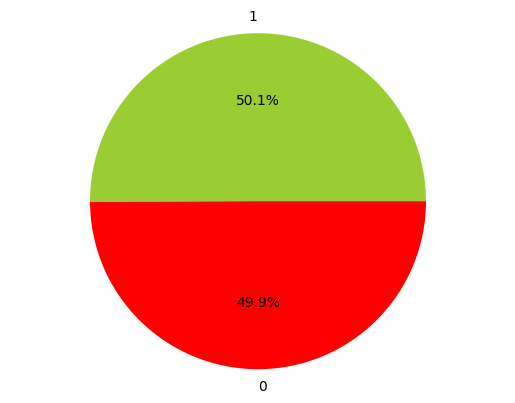

In [19]:
print("Label as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.label.value_counts(),autopct='%1.1f%%', labels=['1','0'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

## Data Preparation

### Data Selection (Feature Selection)

<ipython-input-20-e85ec7cf9881>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '.2f',ax=ax, cmap='viridis')


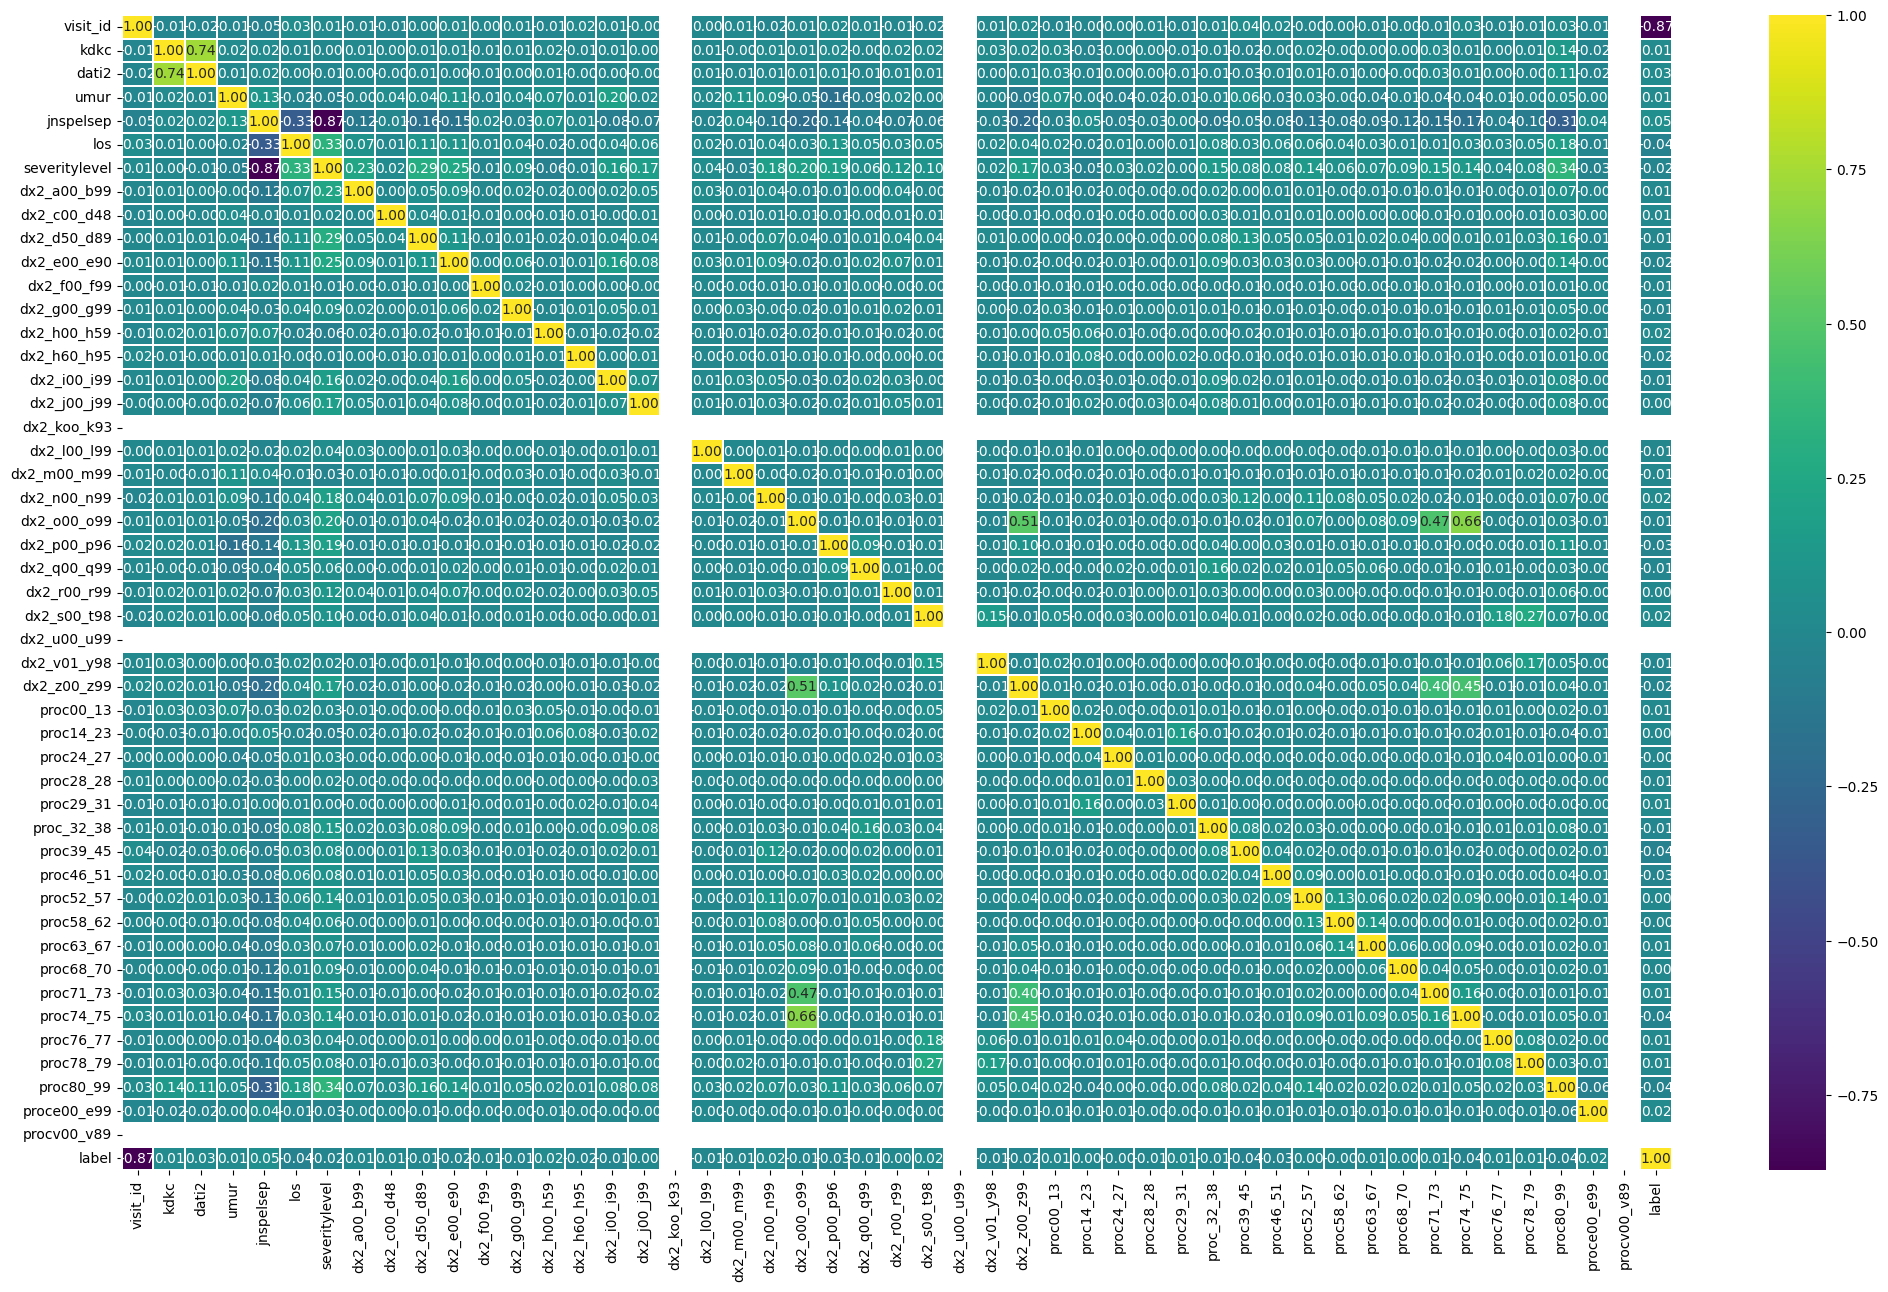

In [20]:
# Matrix Correlation with Heatmap
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '.2f',ax=ax, cmap='viridis')
plt.show()

In [21]:
df.columns

Index(['visit_id', 'kdkc', 'dati2', 'typeppk', 'jkpst', 'umur', 'jnspelsep',
       'los', 'cmg', 'severitylevel', 'diagprimer', 'dx2_a00_b99',
       'dx2_c00_d48', 'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99',
       'dx2_g00_g99', 'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99',
       'dx2_j00_j99', 'dx2_koo_k93', 'dx2_l00_l99', 'dx2_m00_m99',
       'dx2_n00_n99', 'dx2_o00_o99', 'dx2_p00_p96', 'dx2_q00_q99',
       'dx2_r00_r99', 'dx2_s00_t98', 'dx2_u00_u99', 'dx2_v01_y98',
       'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27', 'proc28_28',
       'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51', 'proc52_57',
       'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73', 'proc74_75',
       'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99', 'procv00_v89',
       'label'],
      dtype='object')

In [22]:
unique_values = df.nunique() == 1
unique_values

visit_id         False
kdkc             False
dati2            False
typeppk          False
jkpst            False
umur             False
jnspelsep        False
los              False
cmg              False
severitylevel    False
diagprimer       False
dx2_a00_b99      False
dx2_c00_d48      False
dx2_d50_d89      False
dx2_e00_e90      False
dx2_f00_f99      False
dx2_g00_g99      False
dx2_h00_h59      False
dx2_h60_h95      False
dx2_i00_i99      False
dx2_j00_j99      False
dx2_koo_k93       True
dx2_l00_l99      False
dx2_m00_m99      False
dx2_n00_n99      False
dx2_o00_o99      False
dx2_p00_p96      False
dx2_q00_q99      False
dx2_r00_r99      False
dx2_s00_t98      False
dx2_u00_u99       True
dx2_v01_y98      False
dx2_z00_z99      False
proc00_13        False
proc14_23        False
proc24_27        False
proc28_28        False
proc29_31        False
proc_32_38       False
proc39_45        False
proc46_51        False
proc52_57        False
proc58_62        False
proc63_67  

In [23]:
df_drop = df.copy()

In [24]:
# Feature selection or Dropping ds attributes
# coz this feature didnt have correlation with any atribute 
# or ds 'value' didnt have variability
to_drop = ['visit_id','dx2_koo_k93','procv00_v89','dx2_u00_u99']
df_drop.drop(to_drop, inplace=True, axis = 1)
df_drop

,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,...,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label
0,1107,150,SB,P,64,2,0,F,0,f00_f99,...,0,0,0,0,0,0,0,0,0,1
1,1303,200,C,L,45,1,9,E,3,e00_e90,...,0,0,0,0,0,0,0,4,0,1
2,1114,172,B,P,34,2,0,Q,0,r00_r99,...,0,0,0,0,0,0,0,0,0,1
3,601,90,SC,L,34,2,0,Q,0,r00_r99,...,0,0,0,0,0,0,0,0,0,1
4,1006,130,B,L,27,2,0,F,0,f00_f99,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,2102,353,B,P,48,2,0,Z,0,l00_l99,...,0,0,0,0,0,0,0,1,0,0
200213,1308,212,SD,L,1,2,0,Q,0,q00_q99,...,0,0,0,0,0,0,0,0,0,0
200214,201,38,SB,P,3,2,0,Q,0,r00_r99,...,0,0,0,0,0,0,0,0,0,0
200215,1008,128,B,P,52,1,1,J,1,j00_j99,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df_drop.head()

,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,...,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label
0,1107,150,SB,P,64,2,0,F,0,f00_f99,...,0,0,0,0,0,0,0,0,0,1
1,1303,200,C,L,45,1,9,E,3,e00_e90,...,0,0,0,0,0,0,0,4,0,1
2,1114,172,B,P,34,2,0,Q,0,r00_r99,...,0,0,0,0,0,0,0,0,0,1
3,601,90,SC,L,34,2,0,Q,0,r00_r99,...,0,0,0,0,0,0,0,0,0,1
4,1006,130,B,L,27,2,0,F,0,f00_f99,...,0,0,0,0,0,0,0,0,0,1


### Data Cleaning

In [26]:
# Use this if having missing value
# dropna = df.dropna()

### Data Construct

In [27]:
df_drop['jkpst'].replace(to_replace=['L','P'], value = [0,1], inplace = True)

In [28]:
C= (df_drop.dtypes == 'object')
CategoricalVariables = list(C[C].index)

## Show Categorical Variables
CategoricalVariables

['typeppk', 'cmg', 'diagprimer']

In [29]:
Integertypes = (df_drop.dtypes == 'int64')
Floattypes = (df_drop.dtypes == 'float64')
NumericVariables = list(Integertypes[Integertypes].index) + list(Floattypes[Floattypes].index)

## Show Numeric Variables
NumericVariables

['kdkc',
 'dati2',
 'jkpst',
 'umur',
 'jnspelsep',
 'los',
 'severitylevel',
 'dx2_a00_b99',
 'dx2_c00_d48',
 'dx2_d50_d89',
 'dx2_e00_e90',
 'dx2_f00_f99',
 'dx2_g00_g99',
 'dx2_h00_h59',
 'dx2_h60_h95',
 'dx2_i00_i99',
 'dx2_j00_j99',
 'dx2_l00_l99',
 'dx2_m00_m99',
 'dx2_n00_n99',
 'dx2_o00_o99',
 'dx2_p00_p96',
 'dx2_q00_q99',
 'dx2_r00_r99',
 'dx2_s00_t98',
 'dx2_v01_y98',
 'dx2_z00_z99',
 'proc00_13',
 'proc14_23',
 'proc24_27',
 'proc28_28',
 'proc29_31',
 'proc_32_38',
 'proc39_45',
 'proc46_51',
 'proc52_57',
 'proc58_62',
 'proc63_67',
 'proc68_70',
 'proc71_73',
 'proc74_75',
 'proc76_77',
 'proc78_79',
 'proc80_99',
 'proce00_e99',
 'label']

In [30]:
# Numeric data type
data_num = df_drop.select_dtypes(include=[np.number])

# Category data type
data_cat = df_drop.select_dtypes(exclude=[np.number])

# Get dummies (data transformation)
transform_cat = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [31]:
from numpy.core.defchararray import add
data_cat = transform_cat.assign(new=add('', np.arange(1, len(data_cat) + 1).astype(str)))
data_num = data_num.assign(new=add('', np.arange(1, len(data_num) + 1).astype(str)))
df_trans = pd.concat([data_cat, data_num], axis=1)
df_trans.drop(['new'], axis=1, inplace=True)

In [32]:
df_trans.head()

,typeppk_B,typeppk_C,typeppk_D,typeppk_GD,typeppk_HD,typeppk_I1,typeppk_I2,typeppk_I3,typeppk_I4,typeppk_KB,...,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Columns: 112 entries, typeppk_B  to label
dtypes: int64(46), uint8(66)
memory usage: 82.9 MB


In [34]:
df_trans.columns

Index(['typeppk_B ', 'typeppk_C ', 'typeppk_D ', 'typeppk_GD', 'typeppk_HD',
       'typeppk_I1', 'typeppk_I2', 'typeppk_I3', 'typeppk_I4', 'typeppk_KB',
       ...
       'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73', 'proc74_75',
       'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99', 'label'],
      dtype='object', length=112)

## Build Test Scenario

### Labelling

In [35]:
X = df_trans.drop('label', axis = 1)
y = df_trans['label']

In [36]:
X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((160173, 111), (40044, 111))

In [38]:
# Better perfomance found if the model didnt using Standarization

# # Make Object Scaler
# scaler = StandardScaler()
# # Fitting Scaler with data
# X_train = scaler.fit_transform(X_train)
# # Change train data and test data
# X_test = scaler.transform(X_test)
# y_train = y_train.to_numpy()

## Comparison Modelling

### Decision Tree

In [39]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

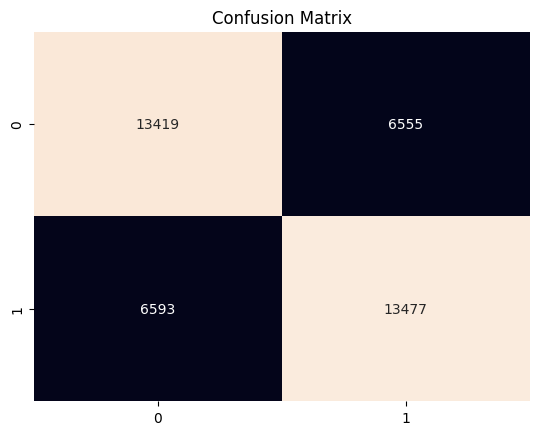

In [40]:
y_pred_dc = np.round(y_pred).astype(int)
cm = confusion_matrix(y_test, y_pred_dc)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [41]:
print(classification_report(y_test, y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67     19974
           1       0.67      0.67      0.67     20070

    accuracy                           0.67     40044
   macro avg       0.67      0.67      0.67     40044
weighted avg       0.67      0.67      0.67     40044

precision_score: 0.6727735623003195
accuracy_score: 0.671661172710019
recall_score: 0.6714997508719481


### Random Forest

In [43]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_class=rfc.predict(X_test)

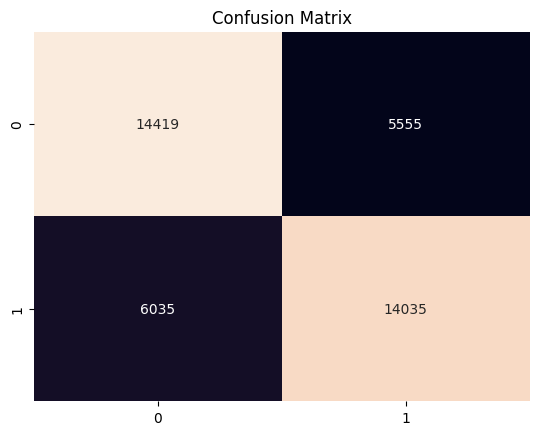

In [44]:
y_pred_rf = np.round(y_pred_class).astype(int)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [45]:
print(classification_report(y_test, y_pred_class))
print('precision_score:',precision_score(y_test,y_pred_class))
print('accuracy_score:',accuracy_score(y_test,y_pred_class))
print('recall_score:',recall_score(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     19974
           1       0.72      0.70      0.71     20070

    accuracy                           0.71     40044
   macro avg       0.71      0.71      0.71     40044
weighted avg       0.71      0.71      0.71     40044

precision_score: 0.7164369576314447
accuracy_score: 0.7105683747877335
recall_score: 0.6993024414549078
